In [1]:
cd ..

/home/agustin/plant-traits


/home/agustin/.cache/pypoetry/virtualenvs/plant-traits-y5eu6WKG-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
import matplotlib.pyplot as plt
import torch
from torchvision.models import ResNet50_Weights, ResNet18_Weights, resnet50, resnet18
from src.utils import set_device, DEVICE
from imageio.v3 import imread
import numpy as np

In [37]:
# weights = ResNet18_Weights.IMAGENET1K_V1
# resnet = resnet18(weights=weights)

weights = ResNet50_Weights.IMAGENET1K_V2
resnet = resnet50(weights=weights)

model = resnet.to(DEVICE)
preprocess = weights.transforms()

In [77]:
file_no = 194665163

In [78]:
img = imread(f'data/planttraits2024/train_images/{file_no}.jpeg')

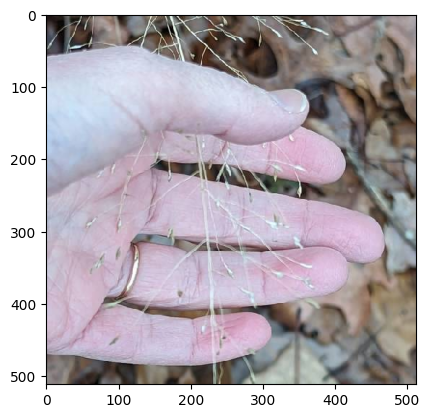

In [79]:
plt.imshow(img)

In [81]:
preds = model(torch.unsqueeze(torch.from_numpy(img).float().T,0).to(DEVICE))

In [82]:
np_preds = preds[0].cpu().detach().numpy()

In [83]:
args = np.argsort(np_preds)[::-1][:5]

In [84]:
args, np_preds[args]

(array([672, 899, 412, 830, 460]),
 array([0.53723985, 0.469     , 0.4395651 , 0.43381542, 0.43126607],
       dtype=float32))

In [65]:
args

array([731, 722, 836, 126, 112])